In [16]:
import tensorflow as tf
import pathlib
import os

In [17]:
data_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/ANN Project/ChestXray')
print(data_dir)

/content/drive/MyDrive/Colab Notebooks/ANN Project/ChestXray


In [18]:
image_count = 0
for class_dir in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_dir)
    if os.path.isdir(class_path):
        num_images = len([
            f for f in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, f))
        ])
        #print(f"{class_dir}: {num_images} görsel")
        image_count += num_images
print(image_count)

3288


In [19]:
img_height = 200
img_width = 200
batch_size = 32

In [20]:
train_dset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                         validation_split=0.2,
                                                         subset="training",
                                                         seed=1025,
                                                         image_size=(img_height, img_width),
                                                         batch_size=batch_size
                                                         )

val_dset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                       validation_split=0.2,
                                                       subset="validation",
                                                       seed=1025,
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size
                                                       )

Found 3288 files belonging to 2 classes.
Using 2631 files for training.
Found 3288 files belonging to 2 classes.
Using 657 files for validation.


In [21]:
from tensorflow.keras import layers, models, optimizers

model_opt1 = models.Sequential([layers.Input(shape=(img_height, img_width, 3)),
                               layers.Rescaling(1./255),

                               # ilk convolution + bn
                               layers.Conv2D(32, (3, 3), activation='relu'),
                               layers.BatchNormalization(),
                               layers.MaxPooling2D(),

                               # ikinci convolution + bn
                               layers.Conv2D(64, (3, 3), activation='relu'),
                               layers.BatchNormalization(),
                               layers.MaxPooling2D(),

                               # ucuncu convolution + bn
                               layers.Conv2D(128, (3, 3), activation='relu'),
                               layers.BatchNormalization(),
                               layers.MaxPooling2D(),

                               # flatten
                               layers.Flatten(),

                               # cikis katmani
                               layers.Dense(1, activation='sigmoid')
                               ])

In [22]:
model_opt1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 198, 198, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 97, 97, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 46, 46, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        67,713 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,857 (632.25 KB)

 Trainable params: 161,409 (630.50 KB)

 Non-trainable params: 448 (1.75 KB)

In [23]:
model_opt1.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                  )

In [24]:
epochs = 30

history_opt = model_opt1.fit(train_dset,
                             validation_data=val_dset,
                             epochs=epochs
                             )

Epoch 1/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 18s 169ms/step - accuracy: 0.8149 - loss: 2.0462 - val_accuracy: 0.5282 - val_loss: 0.9518
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9242 - loss: 0.6726 - val_accuracy: 0.5038 - val_loss: 6.1706
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.9312 - loss: 0.5453 - val_accuracy: 0.5053 - val_loss: 5.3508
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9304 - loss: 0.7646 - val_accuracy: 0.9117 - val_loss: 0.5751
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.9518 - loss: 0.4292 - val_accuracy: 0.8874 - val_loss: 0.7943
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9633 - loss: 0.3442 - val_accuracy: 0.8858 - val_loss: 0.8651
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.9590 - loss: 0.3672 - val_accuracy: 0.9148 - val_loss: 0.9410
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9676 - loss: 0.2384 - val_accuracy: 0.9224 -

In [25]:
import matplotlib.pyplot as plt

def plot_training_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(14, 5))

    # Accuracy grafiği
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Loss grafiği
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

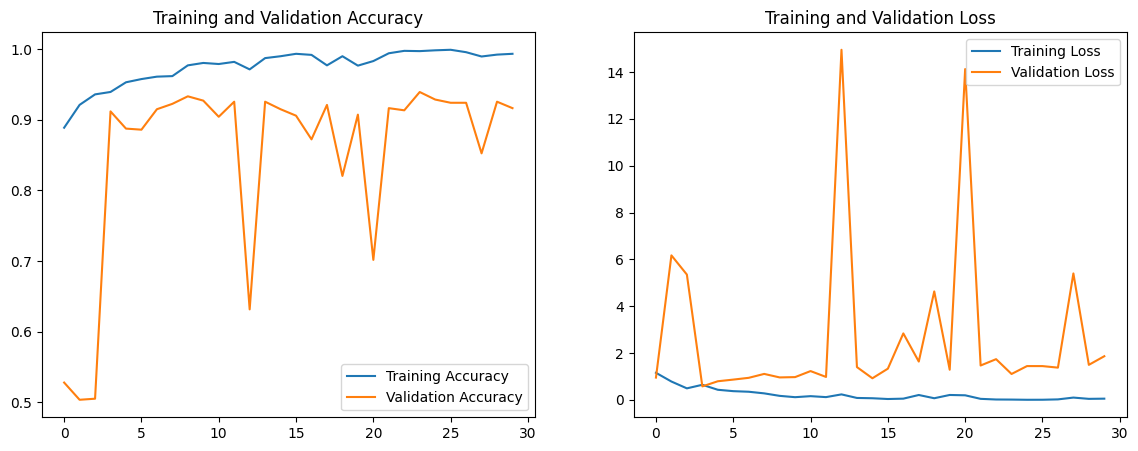

In [26]:
plot_training_curves(history_opt)

In [27]:
model_opt1 = models.Sequential([layers.Input(shape=(img_height, img_width, 3)),
                               layers.Rescaling(1./255),

                               # ilk convolution + bn
                               layers.Conv2D(32, (3, 3), activation='relu'),
                               layers.BatchNormalization(),
                               layers.MaxPooling2D(),

                               # ikinci convolution + bn
                               layers.Conv2D(64, (3, 3), activation='relu'),
                               layers.BatchNormalization(),
                               layers.MaxPooling2D(),

                               # ucuncu convolution + bn
                               layers.Conv2D(128, (3, 3), activation='relu'),
                               layers.BatchNormalization(),
                               layers.MaxPooling2D(),

                               ## flatten + dropout
                               layers.Flatten(),
                               layers.Dropout(0.5),

                               # cikis katmani
                               layers.Dense(1, activation='sigmoid')
                               ])

model_opt1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 198, 198, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 97, 97, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 46, 46, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │        67,713 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,857 (632.25 KB)

 Trainable params: 161,409 (630.50 KB)

 Non-trainable params: 448 (1.75 KB)

In [28]:
model_opt1.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy']
                   )

In [29]:
history_opt2 = model_opt1.fit(train_dset,
                              validation_data=val_dset,
                              epochs=epochs
                              )

Epoch 1/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - accuracy: 0.8211 - loss: 2.1080 - val_accuracy: 0.5038 - val_loss: 5.9932
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9350 - loss: 0.6278 - val_accuracy: 0.5038 - val_loss: 5.1697
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.9408 - loss: 0.3869 - val_accuracy: 0.8341 - val_loss: 0.8164
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.9421 - loss: 0.4150 - val_accuracy: 0.7519 - val_loss: 1.7638
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.9571 - loss: 0.3196 - val_accuracy: 0.8295 - val_loss: 1.3660
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9606 - loss: 0.3651 - val_accuracy: 0.9072 - val_loss: 0.5069
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.9498 - loss: 0.4325 - val_accuracy: 0.9148 - val_loss: 0.5413
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9673 - loss: 0.2393 - val_accuracy: 0.9300 -

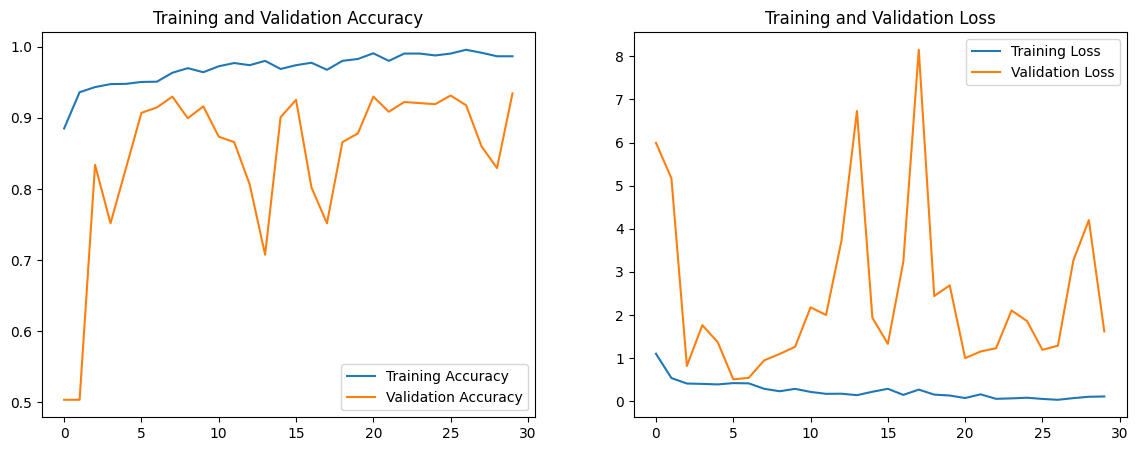

In [30]:
plot_training_curves(history_opt2)

In [31]:
model_opt1 = models.Sequential([layers.Input(shape=(img_height, img_width, 3)),
                               layers.Rescaling(1./255),

                               # ilk convolution + bn + pool
                               layers.Conv2D(32, (3, 3), activation='relu'),
                               layers.BatchNormalization(),
                               layers.MaxPooling2D(),

                               # ikinci convolution + bn + pool
                               layers.Conv2D(64, (3, 3), activation='relu'),
                               layers.BatchNormalization(),
                               layers.MaxPooling2D(),

                               # ucuncu convolution + bn + pool
                               layers.Conv2D(128, (3, 3), activation='relu'),
                               layers.BatchNormalization(),
                               layers.MaxPooling2D(),

                               # flatten + dropout
                               layers.Flatten(),
                               layers.Dropout(0.6),  # dropout degisikligi

                               # cikis katmani
                               layers.Dense(1, activation='sigmoid')
                               ])

model_opt1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 198, 198, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 97, 97, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 46, 46, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │        67,713 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,857 (632.25 KB)

 Trainable params: 161,409 (630.50 KB)

 Non-trainable params: 448 (1.75 KB)

In [32]:
model_opt1.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy']
                   )

In [33]:
history_opt3 = model_opt1.fit(train_dset,
                              validation_data=val_dset,
                              epochs=epochs
                              )

Epoch 1/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - accuracy: 0.8380 - loss: 1.4981 - val_accuracy: 0.5053 - val_loss: 1.6196
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9340 - loss: 0.5367 - val_accuracy: 0.5038 - val_loss: 3.8471
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.9418 - loss: 0.4036 - val_accuracy: 0.5297 - val_loss: 3.8108
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9593 - loss: 0.2729 - val_accuracy: 0.8158 - val_loss: 0.9679
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.9487 - loss: 0.3255 - val_accuracy: 0.9072 - val_loss: 0.6383
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9576 - loss: 0.3169 - val_accuracy: 0.8615 - val_loss: 1.0067
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.9683 - loss: 0.2797 - val_accuracy: 0.8584 - val_loss: 0.6604
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9413 - loss: 0.5135 - val_accuracy: 0.8265 -

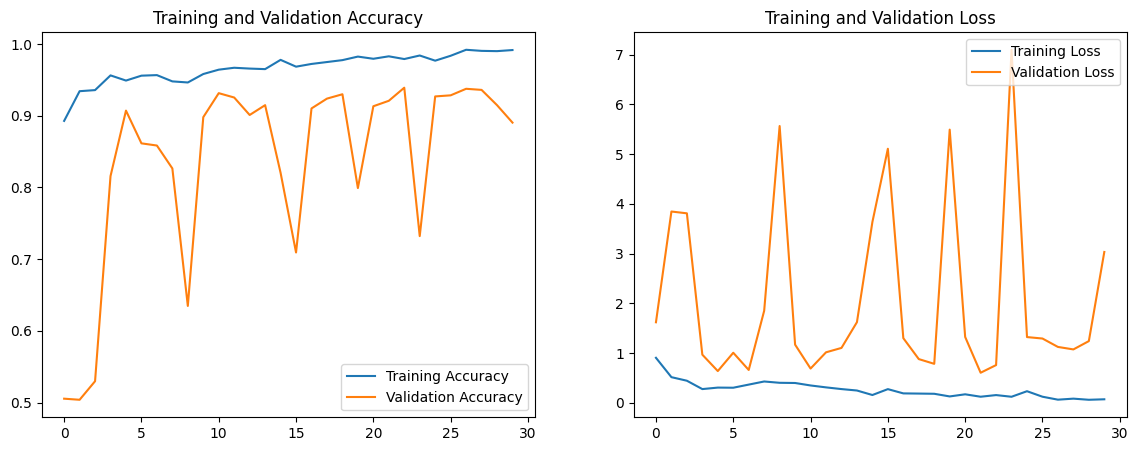

In [34]:
plot_training_curves(history_opt3)

In [35]:
optimizer = optimizers.Adam(learning_rate=0.0001)    # lr optimizasyonu
model_opt1.compile(optimizer=optimizer,
                   loss='binary_crossentropy',
                   metrics=['accuracy']
                   )

In [36]:
history_opt4 = model_opt1.fit(train_dset,
                              validation_data=val_dset,
                              epochs=epochs
                              )

Epoch 1/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 14s 115ms/step - accuracy: 0.9927 - loss: 0.0414 - val_accuracy: 0.9376 - val_loss: 1.0666
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9956 - loss: 0.0256 - val_accuracy: 0.9361 - val_loss: 1.0280
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.9968 - loss: 0.0240 - val_accuracy: 0.9376 - val_loss: 0.9497
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9962 - loss: 0.0204 - val_accuracy: 0.9346 - val_loss: 1.0301
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.9959 - loss: 0.0068 - val_accuracy: 0.9422 - val_loss: 0.9850
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9952 - loss: 0.0191 - val_accuracy: 0.9406 - val_loss: 1.1569
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.9971 - loss: 0.0181 - val_accuracy: 0.9391 - val_loss: 1.0289
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.9923 - loss: 0.0403 - val_accuracy: 0.9406 -

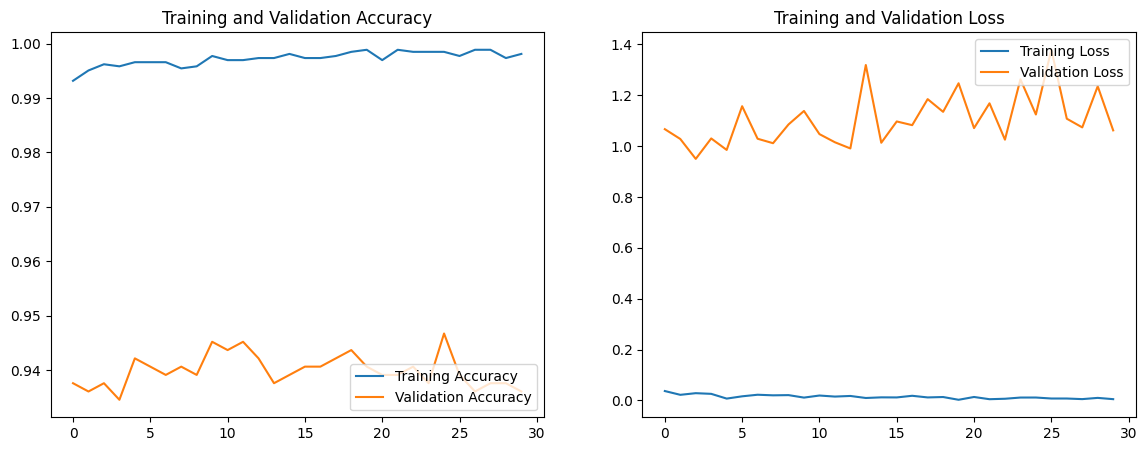

In [37]:
plot_training_curves(history_opt4)

In [38]:
optimizer = optimizers.Adam(learning_rate=0.0005)    # lr degisikligi
model_opt1.compile(optimizer=optimizer,
                   loss='binary_crossentropy',
                   metrics=['accuracy']
                   )

In [39]:
history_opt5 = model_opt1.fit(train_dset,
                              validation_data=val_dset,
                              epochs=epochs
                              )

Epoch 1/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 13s 109ms/step - accuracy: 0.9969 - loss: 0.0175 - val_accuracy: 0.8782 - val_loss: 1.4172
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.9910 - loss: 0.0716 - val_accuracy: 0.9437 - val_loss: 1.4235
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9979 - loss: 0.0183 - val_accuracy: 0.9239 - val_loss: 1.5579
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.9947 - loss: 0.0255 - val_accuracy: 0.8995 - val_loss: 2.8516
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.9969 - loss: 0.0324 - val_accuracy: 0.9300 - val_loss: 1.6259
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.9923 - loss: 0.0394 - val_accuracy: 0.9346 - val_loss: 1.4726
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9947 - loss: 0.0428 - val_accuracy: 0.9346 - val_loss: 1.6376
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.9956 - loss: 0.0267 - val_accuracy: 0.9376 -

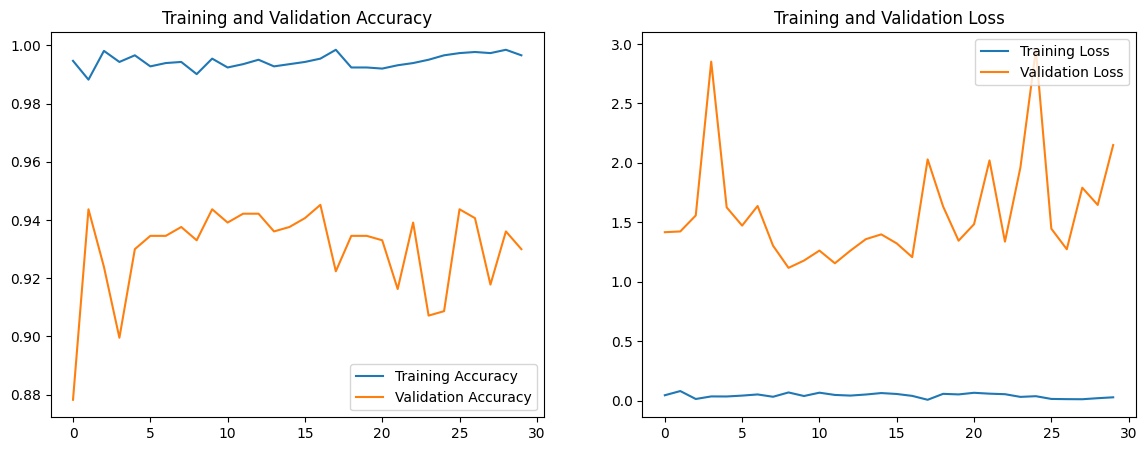

In [40]:
plot_training_curves(history_opt5)

In [41]:
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models

weight_decay = 1e-4  # normallestirme parametresi

model_opt1 = models.Sequential([layers.Input(shape=(img_height, img_width, 3)),
                                layers.Rescaling(1./255),

                                # 1. conv + bn ve l2 normalizasyon
                                layers.Conv2D(32, (3, 3), activation='relu',
                                              kernel_regularizer=regularizers.l2(weight_decay)),
                                layers.BatchNormalization(),
                                layers.MaxPooling2D(),

                                # 2. conv + bn ve l2 normalizasyon
                                layers.Conv2D(64, (3, 3), activation='relu',
                                              kernel_regularizer=regularizers.l2(weight_decay)),
                                layers.BatchNormalization(),
                                layers.MaxPooling2D(),

                                # 3. conv + bn ve l2 normalizasyon
                                layers.Conv2D(128, (3, 3), activation='relu',
                                              kernel_regularizer=regularizers.l2(weight_decay)),
                                layers.BatchNormalization(),
                                layers.MaxPooling2D(),

                                # flatten + dropout
                                layers.Flatten(),
                                layers.Dropout(0.6),

                                # normalizasyonlu cikis katmani
                                layers.Dense(1, activation='sigmoid',
                                             kernel_regularizer=regularizers.l2(weight_decay))
                                ])

model_opt1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 198, 198, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 97, 97, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 46, 46, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │        67,713 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,857 (632.25 KB)

 Trainable params: 161,409 (630.50 KB)

 Non-trainable params: 448 (1.75 KB)

In [42]:
optimizer = optimizers.Adam(learning_rate=0.0001)   # lr'i tekrar dusuruyorum
model_opt1.compile(optimizer=optimizer,
                   loss='binary_crossentropy',
                   metrics=['accuracy']
                   )

In [43]:
history_opt6 = model_opt1.fit(train_dset,
                              validation_data=val_dset,
                              epochs=epochs
                              )

Epoch 1/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 15s 122ms/step - accuracy: 0.8095 - loss: 0.6457 - val_accuracy: 0.5038 - val_loss: 1.0012
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.9463 - loss: 0.1797 - val_accuracy: 0.5038 - val_loss: 1.1329
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9417 - loss: 0.1740 - val_accuracy: 0.5084 - val_loss: 0.7568
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.9554 - loss: 0.1319 - val_accuracy: 0.5205 - val_loss: 1.0468
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9660 - loss: 0.1097 - val_accuracy: 0.7291 - val_loss: 0.6599
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.9695 - loss: 0.0974 - val_accuracy: 0.8554 - val_loss: 0.4127
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9736 - loss: 0.0932 - val_accuracy: 0.9346 - val_loss: 0.1922
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9700 - loss: 0.0893 - val_accuracy: 0.9300 -

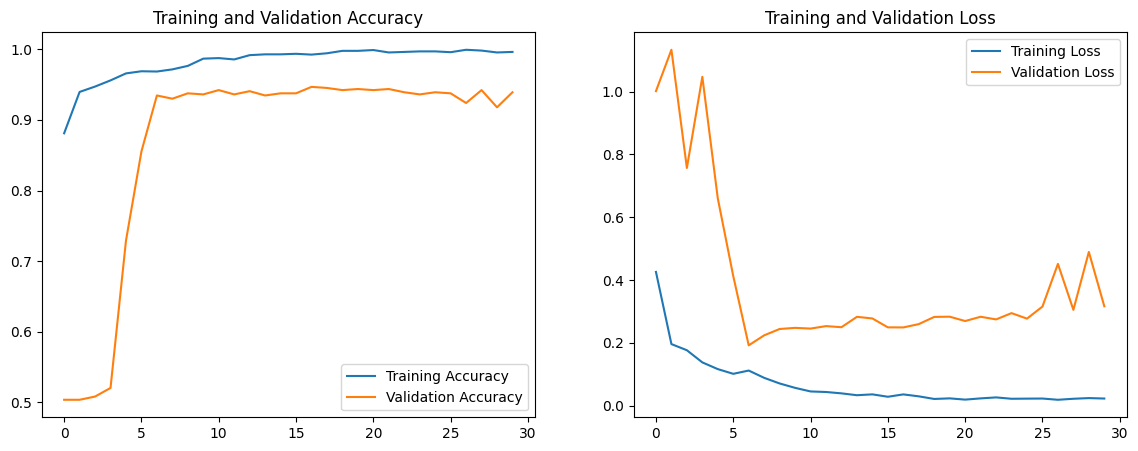

In [44]:
plot_training_curves(history_opt6)

## history6 modelinde kullandigimiz model val_loss bakimindan da basarili duruyordu. early_stoppage kullanirsak guzel sonuc alabilecegimizi dusunuyorum.

In [50]:
from tensorflow.keras import regularizers
from tensorflow.keras import layers, models

weight_decay = 1e-4  # normalizasyon parametresi

model_opt1 = models.Sequential([layers.Input(shape=(img_height, img_width, 3)),
                                layers.Rescaling(1./255),

                                # 1. conv + bn ve l2 normalizasyon
                                layers.Conv2D(32, (3, 3), activation='relu',
                                              kernel_regularizer=regularizers.l2(weight_decay)),
                                layers.BatchNormalization(),
                                layers.MaxPooling2D(),

                                # 2. conv + bn ve l2 normalizasyon
                                layers.Conv2D(64, (3, 3), activation='relu',
                                              kernel_regularizer=regularizers.l2(weight_decay)),
                                layers.BatchNormalization(),
                                layers.MaxPooling2D(),

                                # 3. conv + bn ve l2 normalizasyon
                                layers.Conv2D(128, (3, 3), activation='relu',
                                              kernel_regularizer=regularizers.l2(weight_decay)),
                                layers.BatchNormalization(),
                                layers.MaxPooling2D(),

                                # flatten + dropout
                                layers.Flatten(),
                                layers.Dropout(0.6),

                                # normalizasyonlu cikis katmani
                                layers.Dense(1, activation='sigmoid',
                                             kernel_regularizer=regularizers.l2(weight_decay))
                                ])

model_opt1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 198, 198, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 97, 97, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 46, 46, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │        67,713 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,857 (632.25 KB)

 Trainable params: 161,409 (630.50 KB)

 Non-trainable params: 448 (1.75 KB)

In [51]:
from tensorflow.keras.callbacks import EarlyStopping

optimizer = optimizers.Adam(learning_rate=0.0001)
model_opt1.compile(optimizer=optimizer,
                   loss='binary_crossentropy',
                   metrics=['accuracy'],
                   )

early_stop = EarlyStopping(monitor='val_loss',
                           patience=3,        # 3 epoch boyunca gelisme olmazsa durduracak
                           restore_best_weights=True)

history_opt_last = model_opt1.fit(train_dset,
                             validation_data=val_dset,
                             epochs=30,
                             callbacks=[early_stop])

Epoch 1/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 15s 121ms/step - accuracy: 0.8172 - loss: 0.5488 - val_accuracy: 0.5038 - val_loss: 0.8359
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9406 - loss: 0.2052 - val_accuracy: 0.5038 - val_loss: 0.8215
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.9216 - loss: 0.2254 - val_accuracy: 0.5373 - val_loss: 0.8045
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.9579 - loss: 0.1383 - val_accuracy: 0.6514 - val_loss: 0.7706
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.9610 - loss: 0.1323 - val_accuracy: 0.7778 - val_loss: 0.6115
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9680 - loss: 0.1032 - val_accuracy: 0.8097 - val_loss: 0.6050
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.9729 - loss: 0.0811 - val_accuracy: 0.9148 - val_loss: 0.2347
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - accuracy: 0.9792 - loss: 0.0704 - val_accuracy: 0.9239 -

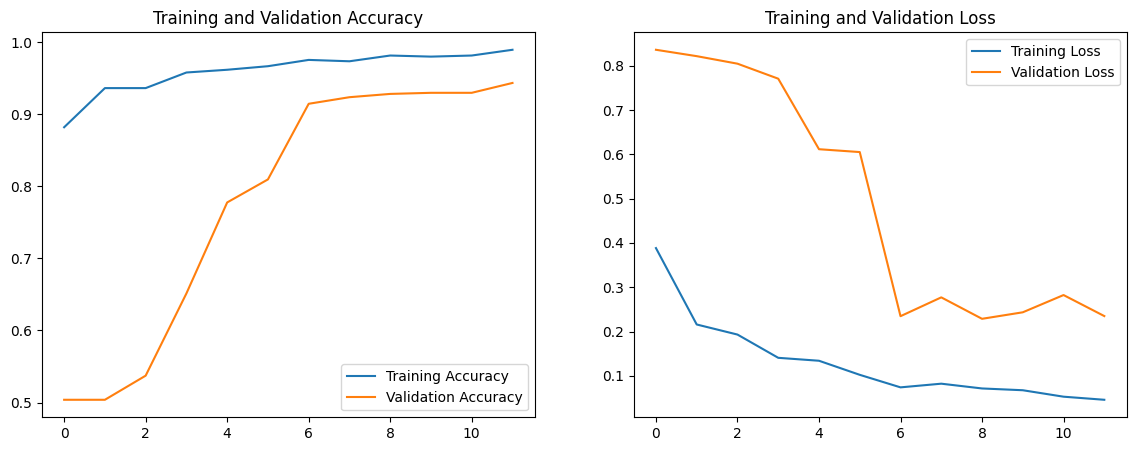

In [53]:
plot_training_curves(history_opt_last)

In [48]:
#model_opt1.save('/content/drive/MyDrive/Colab Notebooks/ANN Project/Saved Models/CNN2_Last.h5')

In [52]:
from tensorflow.keras.preprocessing import image

test_dir = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/ANN Project/TestSet')

class_names = ['Normal', 'Pneumonia']

for fname in os.listdir(test_dir):
    if fname.lower().endswith(('.jpeg')):
        img_path = os.path.join(test_dir, fname)

        img = image.load_img(img_path, target_size=(img_height, img_width))
        img_array = image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)  # (1, h, w, 3)

        prediction = model_opt1.predict(img_array)
        pred_class = class_names[int(prediction[0][0] > 0.5)]

        print(f"{fname} --> Tahmin: {pred_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
NORMAL2-IM-0872-0001.jpeg --> Tahmin: Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
NORMAL2-IM-1128-0001.jpeg --> Tahmin: Normal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
person543_bacteria_2282.jpeg --> Tahmin: Pneumonia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
person563_bacteria_2337.jpeg --> Tahmin: Pneumonia
